# Assignment 3

#### 1. Generate a figure from the given dataset that resembles Figure 1.

In [173]:
import pandas as pd

df = pd.read_csv("spiral-dataset.csv", delimiter='\t',header=None,names=['x','y','Class'])
df.head()

,x,y,Class
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3


In [174]:
class_1_df = df.loc[df['Class'] == 1]
class_2_df = df.loc[df['Class'] == 2]
class_3_df = df.loc[df['Class'] == 3]
class_3_df

,x,y,Class
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3
...,...,...,...
101,21.85,15.25,3
102,21.75,15.15,3
103,21.65,15.05,3
104,21.55,15.00,3


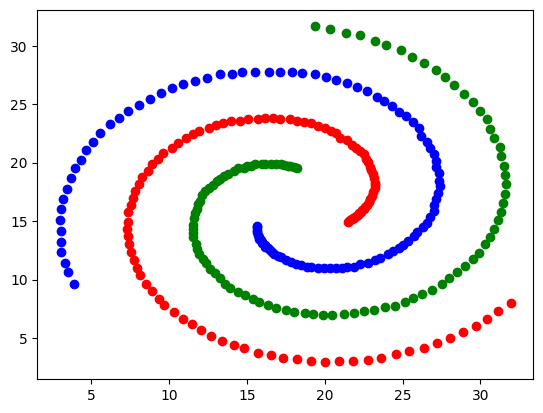

In [175]:
import matplotlib.pyplot as plt

plt.scatter(class_1_df['x'], class_1_df['y'], color='g')
plt.scatter(class_2_df['x'], class_2_df['y'], color='b')
plt.scatter(class_3_df['x'], class_3_df['y'], color='r')
plt.show()


#### 2. Implement the k-means clustering algorithm. And do the following:
**a)**
- Run your k-means algorithm on the given dataset setting the value k=3 (because
    visually we only have 3 clusters to worry about). And do not forget to randomly initialize the 3 centroids. 

In [176]:
# split into training and test set
x = df.drop(columns=['Class'])
y = df['Class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
y_train.head()

(249, 2) (249,)
(63, 2) (63,)


64     3
34     3
137    1
264    2
81     3
Name: Class, dtype: int64

In [177]:
import random
import numpy as np 

# Repeat steps 2 and 3 until the centroids no longer change significantly (i.e., convergence) or until a maximum number of iterations is reached.
def df_to_list():
    return list(X_train.values)

# Randomly select 3 centroids from the dataset
def choose_centroids(data, k):
    # choose random centroids
    return random.sample(data, k)  

# For each data point, calculate the Euclidean distance to each of the centroids, and assign the point to the nearest centroid’s cluster.
def assign_clusters(data,centroids):
    k = len(centroids)
    clusters = {}

    for i in range(k):
        clusters[i] = []

    for point in data: 
        euclid_distance = []
        for i in range(k):
            euclid_distance.append(np.linalg.norm(np.array(point) - np.array(centroids[i])))
        clusters[euclid_distance.index(min(euclid_distance))].append(point)

    return clusters

# For each cluster, recalculate the centroid by finding the mean of all points assigned to that cluster.
def recalculate_centroids(clusters, data, k):
    new_centroids = []
    for i in range(k):
        if clusters[i]:  # Ensure the cluster is not empty
            new_centroids.append(np.mean(clusters[i], axis=0))
        else:
            # Reinitialize centroid with a random point from the data if the cluster is empty
            new_centroids.append(random.choice(data))
    return new_centroids

def k_means(k=3, max_iters=300, tol=1e-4):
    data = df_to_list()
    centroids = choose_centroids(data, k)
    
    for _ in range(max_iters):
        clusters = assign_clusters(data, centroids)
        new_centroids = recalculate_centroids(clusters, data, k)
        
        # Check for convergence (if centroids do not change significantly)
        if np.allclose(centroids, new_centroids, atol=tol):
            break
        centroids = new_centroids

    return centroids, clusters

centroids, clusters = k_means()
print("Centroids:", centroids)
print("Clusters:", clusters)

Centroids: [array([23.74556962, 21.60822785]), array([21.18275862,  9.80977011]), array([10.09698795, 17.25542169])]
Clusters: {0: [array([17.15, 23.75]), array([27.15, 16.9 ]), array([22.9 , 19.65]), array([29.95, 24.45]), array([31.15, 15.05]), array([22.9, 16.9]), array([21.  , 22.15]), array([27.35, 18.45]), array([26.6, 21.8]), array([23.05, 17.15]), array([22.  , 21.25]), array([19.35, 31.65]), array([23.95, 30.05]), array([31.6 , 17.35]), array([22.65, 20.35]), array([20.4, 22.7]), array([27.4, 18. ]), array([23.1, 19. ]), array([28.95, 25.85]), array([23.2 , 30.45]), array([21.75, 21.55]), array([22.25, 30.9 ]), array([18.55, 27.7 ]), array([22.35, 15.8 ]), array([15.7 , 23.75]), array([18.65, 23.5 ]), array([25.65, 23.45]), array([20.35, 31.45]), array([31.35, 20.55]), array([22.25, 21.  ]), array([27. , 15.9]), array([26.55, 14.85]), array([22.75, 20.05]), array([18.2 , 19.55]), array([23.2 , 18.05]), array([15.55, 27.75]), array([27.15, 20.15]), array([30.9, 22.1]), array([1

In [178]:
training_set = pd.concat([X_train, y_train])
training_1 = training_set.loc[df['Class'] == 1]
training_2 = training_set.loc[df['Class'] == 2]
training_3 = training_set.loc[df['Class'] == 3]


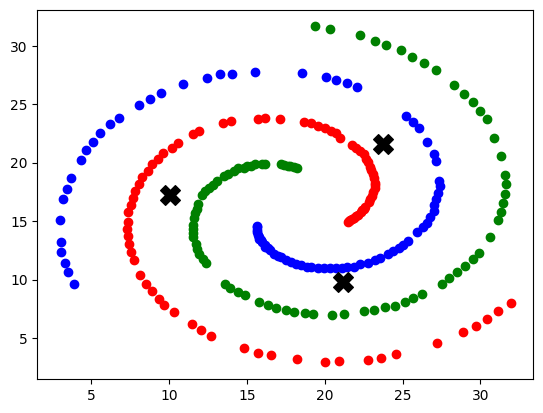

In [179]:
plt.scatter(training_1['x'], training_1['y'], color='g')
plt.scatter(training_2['x'], training_2['y'], color='b')
plt.scatter(training_3['x'], training_3['y'], color='r')
for i, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[1], color="black", edgecolor='k', marker='X', s=200, label=f'Centroid {i+1}')
plt.show()


**b)**
- Once your k-means algorithm has converged above, stop and from your clustering result compute the intrinsic performance metric: Sum of Squared Error, SSE (smaller the better), and the extrinsic performance metric: Rand-Index, RI (higher the better).

In [180]:
def calculate_SSE(clusters, centroids):
    sse = 0
    for i, cluster in clusters.items():
        for point in cluster:
            sse += np.linalg.norm(np.array(point) - np.array(centroids[i])) ** 2
    return sse

SSE = calculate_SSE(clusters,centroids)
print("SSE:", float(SSE))

SSE: 9321.998241828078


In [181]:

from sklearn.metrics import adjusted_rand_score
def calculate_RI(centroids):
    labels_pred = []
    for point in X_train.values:
        distances = [np.linalg.norm(point - centroid) for centroid in centroids]
        cluster_label = distances.index(min(distances))
        labels_pred.append(cluster_label)
    rand_index = adjusted_rand_score(y_train, labels_pred)
    return rand_index

RI = calculate_RI(centroids)
print("RI:", RI)

RI: 0.0007053591681721113


**2c)**
    Repeat Task (2.a) & (2.b) another 9 (nine) times randomizing again the initial centroids, and report out of the 10 runs of k-means what is the best SSE & RI you could get.

**2d)**
    Please draw the clustering results (like Figure 1).

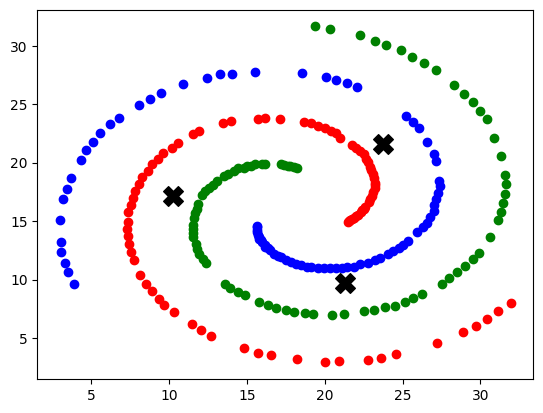

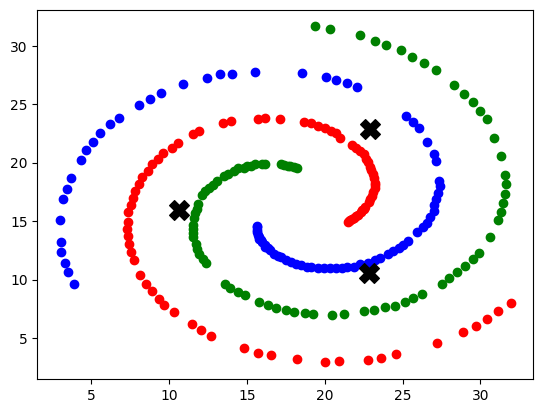

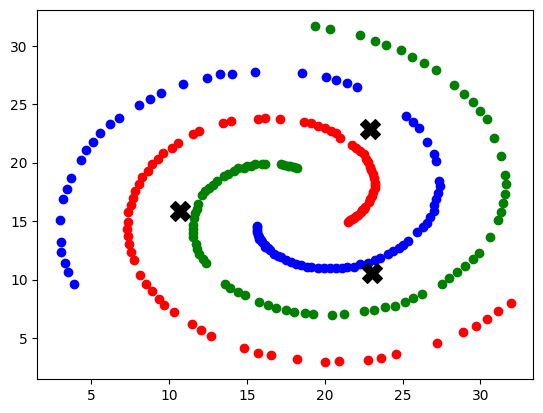

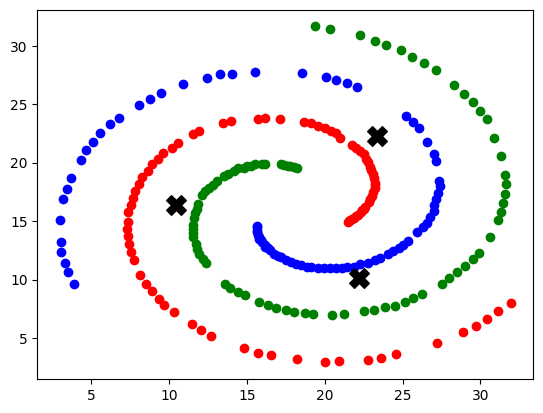

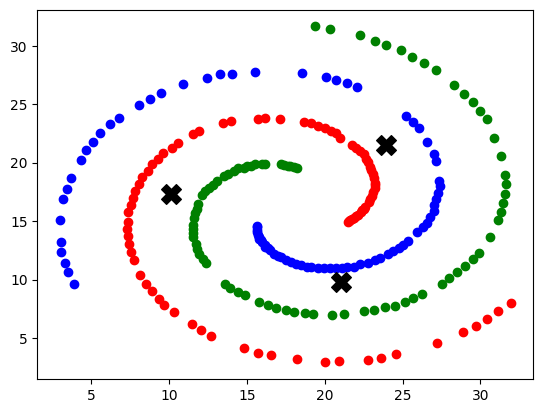

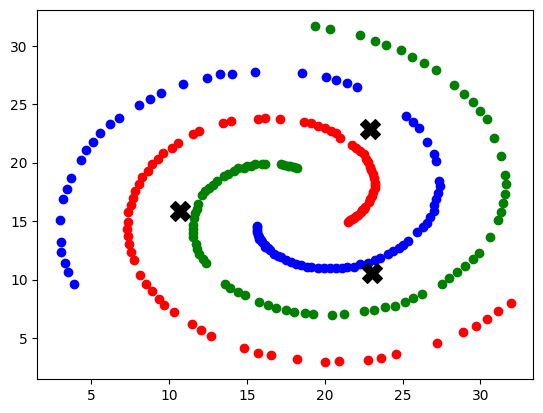

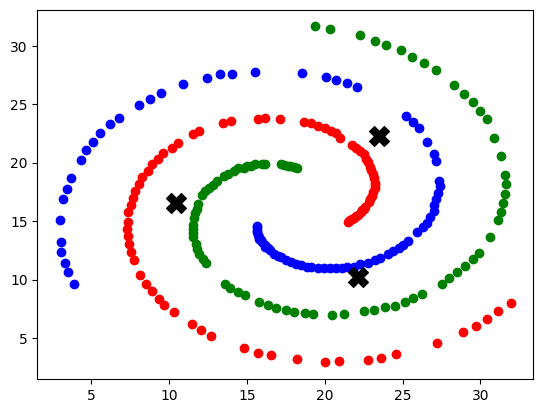

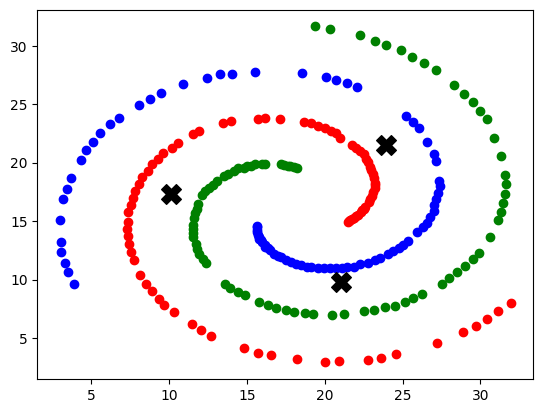

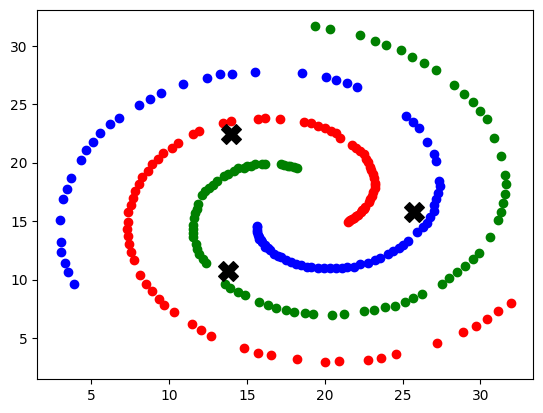

In [184]:
# second round
SSE = []
RI_arr = []

for rounds in range(9):
    centroids, clusters = k_means()
    
    sse = calculate_SSE(clusters, centroids)
    SSE.append(sse)

    ri = calculate_RI(centroids)
    RI_arr.append(ri)

    plt.scatter(training_1['x'], training_1['y'], color='g')
    plt.scatter(training_2['x'], training_2['y'], color='b')
    plt.scatter(training_3['x'], training_3['y'], color='r')
    for i, centroid in enumerate(centroids):
        plt.scatter(centroid[0], centroid[1], color="black", edgecolor='k', marker='X', s=200, label=f'Centroid {i+1}')
    plt.show()
    # centroids_dict[rounds] = centroids
    # clusters_arr.append(clusters)




In [183]:
print(min(SSE))
print(max(RI_arr))

9326.454357850982
0.0020218565358785376


Out of all 10 runs of k-means, the best SSE was `9326.454357850982`. As for the RI score the best was  `0.0020218565358785376`. From the RI score it can be said that the results of the centroids are not very accurate considering a score of 1 is the best. 

#### Implement the Hierarchical clustering algorithm

3.a) Using the “single linkage” method, run the hierarchical clustering algorithm on the
dataset, and get a 3-cluster result (by cutting the dendrogram at a certain height), and report
SSE and RI.

3.b) Using the “complete linkage” method, run the hierarchical clustering algorithm on the
dataset, and get a 3-cluster result (by cutting the dendrogram at a certain height), and report
SSE and RI.

3.c) Using the “average linkage” method, run the hierarchical clustering algorithm on the
dataset, and get a 3-cluster result (by cutting the dendrogram at a certain height), and report
SSE and RI.

3.d) Using the “centroid linkage” method, run the hierarchical clustering algorithm on the
dataset, and get a 3-cluster result (by cutting the dendrogram at a certain height), and report
SSE and RI.

3.e) Please comment, out of the 4 clustering results (3.a), (3.b), (3.c) and (3.d) which
method gets you the best SSE as well as RI.

3.f) Please draw the clustering results (like Figure 1).

In [205]:
X_train.values

array([[17.15, 23.75],
       [ 7.75, 11.7 ],
       [29.5 , 11.75],
       [27.15, 16.9 ],
       [22.9 , 19.65],
       [ 8.3 , 18.75],
       [29.95, 24.45],
       [15.  , 19.7 ],
       [13.55, 18.85],
       [31.15, 15.05],
       [25.7 ,  8.4 ],
       [ 5.15, 21.8 ],
       [21.65, 15.05],
       [16.9 ,  7.6 ],
       [22.9 , 16.9 ],
       [15.65, 14.6 ],
       [21.  , 22.15],
       [15.8 , 13.5 ],
       [16.75, 12.2 ],
       [15.8 ,  8.05],
       [24.4 , 12.45],
       [ 9.35,  8.35],
       [27.35, 18.45],
       [14.85,  4.1 ],
       [ 8.65, 19.3 ],
       [11.55, 14.  ],
       [26.6 , 21.8 ],
       [16.2 , 19.9 ],
       [23.05, 17.15],
       [29.9 , 12.3 ],
       [10.3 ,  7.25],
       [ 6.2 , 23.3 ],
       [25.95, 14.1 ],
       [ 7.35, 13.75],
       [13.95,  9.3 ],
       [11.85, 16.5 ],
       [15.75, 13.85],
       [14.15, 19.25],
       [11.75, 13.05],
       [11.65, 15.7 ],
       [17.  , 12.05],
       [ 8.05, 24.95],
       [25.05, 12.95],
       [24.

In [199]:
data = X_train.values
# Calculate matrix
proximity_matrix = np.zeros((data.shape[0], data.shape[0]))
for i in range(data.shape[0]):
    for j in range(data.shape[0]):
        proximity_matrix[i, j] = np.linalg.norm(data[i] - data[j])

print(len(proximity_matrix))
print(len(data))
print(proximity_matrix)

249
249
[[ 0.         15.28275172 17.21982869 ... 11.50847514  9.1253767
  12.32203311]
 [15.28275172  0.         21.75005747 ... 25.38331145  8.23073508
   4.15992788]
 [17.21982869 21.75005747  0.         ... 14.89840596 22.13526598
  17.72286659]
 ...
 [11.50847514 25.38331145 14.89840596 ...  0.         20.54075218
  21.60676977]
 [ 9.1253767   8.23073508 22.13526598 ... 20.54075218  0.
   7.76208735]
 [12.32203311  4.15992788 17.72286659 ... 21.60676977  7.76208735
   0.        ]]


In [ ]:



def agglomorative_hierarchical():
    # 1. Compute the proximity matrix 
    data = X_train.values
    proximity_matrix = np.zeros((data.shape[0], data.shape[0]))
    for i in range(data.shape[0]):
        for j in range(data.shape[0]):
            proximity_matrix[i, j] = np.linalg.norm(data[i] - data[j])
    
    # 2. Let each data point be a cluster 
    clusters = {}
    for i,point in enumerate(data):
        clusters[i] = point
    print(clusters)

    # REPEAT
    #3. Merge the two closest clusters
    #   Update the proximity matric
    for row in proximity_matrix:
        min_value = np.min(row[np.nonzero(row)])
    print(min_value)
    



    # UNTIL only a single cluster remains 
    

matrix = agglomorative_hierarchical()


{0: array([17.15, 23.75]), 1: array([ 7.75, 11.7 ]), 2: array([29.5 , 11.75]), 3: array([27.15, 16.9 ]), 4: array([22.9 , 19.65]), 5: array([ 8.3 , 18.75]), 6: array([29.95, 24.45]), 7: array([15. , 19.7]), 8: array([13.55, 18.85]), 9: array([31.15, 15.05]), 10: array([25.7,  8.4]), 11: array([ 5.15, 21.8 ]), 12: array([21.65, 15.05]), 13: array([16.9,  7.6]), 14: array([22.9, 16.9]), 15: array([15.65, 14.6 ]), 16: array([21.  , 22.15]), 17: array([15.8, 13.5]), 18: array([16.75, 12.2 ]), 19: array([15.8 ,  8.05]), 20: array([24.4 , 12.45]), 21: array([9.35, 8.35]), 22: array([27.35, 18.45]), 23: array([14.85,  4.1 ]), 24: array([ 8.65, 19.3 ]), 25: array([11.55, 14.  ]), 26: array([26.6, 21.8]), 27: array([16.2, 19.9]), 28: array([23.05, 17.15]), 29: array([29.9, 12.3]), 30: array([10.3 ,  7.25]), 31: array([ 6.2, 23.3]), 32: array([25.95, 14.1 ]), 33: array([ 7.35, 13.75]), 34: array([13.95,  9.3 ]), 35: array([11.85, 16.5 ]), 36: array([15.75, 13.85]), 37: array([14.15, 19.25]), 38: